In [54]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [55]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
data = np.array(df.iloc[:100, [0,1,-1]])

In [59]:
X=data[:,:2]
y=data[:,-1]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

In [82]:
def z(x,w):
    z=0
    for i in range(len(x)):
        z+=w[i]*x[i]
    return z

### $z={1 \over {1+e^{-w^Tx}}}$

$Cost(h_\theta(x),y)=-y \times log(h_\theta(x))-(1-y) \times log(1-h_\theta(x))$

$J(\theta)=-{1 \over m} \sum_{i=1}^m[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$

${\partial \over {\partial \theta_j}}J(\theta)={1\over m}{\sum}_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})·x_j^{(i)}$

$\theta_j:=\theta_j-\alpha{\partial \over {\partial \theta_j}}J(\theta)$

$\theta_j:=\theta_j-\alpha{1\over m}{\sum}_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})·x_j^{(i)}$

In [159]:
# 初始化所有参数w都为1
w_init=[1,1]
# 初始化损失函数的值为0
cost=[0,0]
#学习率
rating=0.1
# 迭代次数
iters=1000
# 迭代多次进行梯度下降
for k in range(iters):
    # 遍历每一个测试样本的x
    for i in range(len(X_train)):
        # 遍历每一个测试样本x的第j个参数对应的x 计算出第j个参数的损失
        for j in range(len(X_train[i])):
            cost[j]+=(sigmoid(z(x=X_train[i],w=w_init))-y_train[i])*X_train[i][j]
        cost[j]=cost[j]/len(X_train)*rating
        w_init[j]-=cost[j]
w_init

[1, -1.773343960039916]

$w_0=1$ $w_1=-1.77$

$w_0*x_0+w_1x_1=0$

$x_1={{-w_0*x_0}\over{w_1}}$

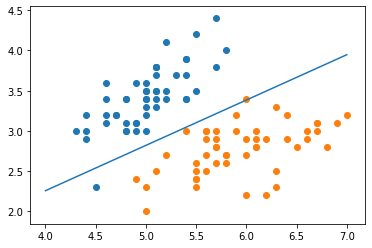

In [160]:
x_points = np.arange(4, 8)
y_ = -(w_init[0]*x_points)/w_init[1]
plt.plot(x_points, y_)

plt.scatter(X[:50,0],X[:50,1])
plt.scatter(X[50:,0],X[50:,1])